## Welcome to the SolPOC Notebook !
### In a way to pick up the software, we propose you to learn and test the key features in a way to be familiar with the software before usage.<br>

# Chapter 7 : Set all variables

We saw in previous chapters how to optimize and find the best Stack to solve a problem. But for some users, the stack is already known and the optimization is not required (the user just want to calculate the solution). Let's see how to make that ! 

For this type of procedure, the user have to run the Curve_RTA file.

In this file, the user set manually what he wants to calculate. Let's do the same procedures as usual :

In [4]:
import numpy as np
import time
from solpoc import *
import random 
import os
import math
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches
from matplotlib.patches import Circle

Comment = "We can write a comment which will be printed into the txt file"
Mat_Stack = ["BK7", "Al-SiO2", "Au"]
d_Stack = [1000000, 100, 100]
vf = [0, 0.6, 0] 
Wl = np.arange(280,2505,5)
Ang = 0
n_Stack, k_Stack = Made_Stack(Mat_Stack, Wl)
n_Stack, k_Stack = Made_Stack_vf(n_Stack, k_Stack, vf)
Wl_Sol , Sol_Spec , name_Sol_Spec= open_SolSpec('Materials/SolSpec.txt')
Sol_Spec = np.interp(Wl, Wl_Sol, Sol_Spec)

parameters = {'Wl': Wl, # I store a variable named "Wl", and give it Wl value
            'Ang': Ang,
            'd_Stack' : d_Stack,
            'vf' : vf,
            'Wl' : Wl,
            'Th_Substrate' : d_Stack[0],
            'Mat_Stack' : Mat_Stack,
            'Sol_Spec' : Sol_Spec,
            'n_Stack' : n_Stack,
            'k_Stack' : k_Stack,}

Experience_results = ({
    'd_Stack' : d_Stack,
    'vf' : vf,})

print("Start of the program")
launch_time = datetime.now().strftime("%Hh-%Mm-%Ss")
print("Launch at " + launch_time)

date_time = datetime.now().strftime("%Y-%m-%d-%Hh%M")
directory = date_time
if not os.path.exists(directory):
    os.makedirs(directory)
print("The '" + directory + "' directory has been created")

Rs, Ts, As = evaluate_RTA_s(d_Stack, parameters)
R, T, A = RTA_curve(d_Stack, parameters)

Experience_results.update({
    'R' : R,
    'T' : T,
    'A' : A,
    'Rs' : Rs,
    'Ts' : Ts,
    'As' : As,})

Start of the program
Launch at 14h-37m-21s
The '2023-12-07-14h37' directory has been created


We can now plot what we want like the Reflectivity of the stack for example :

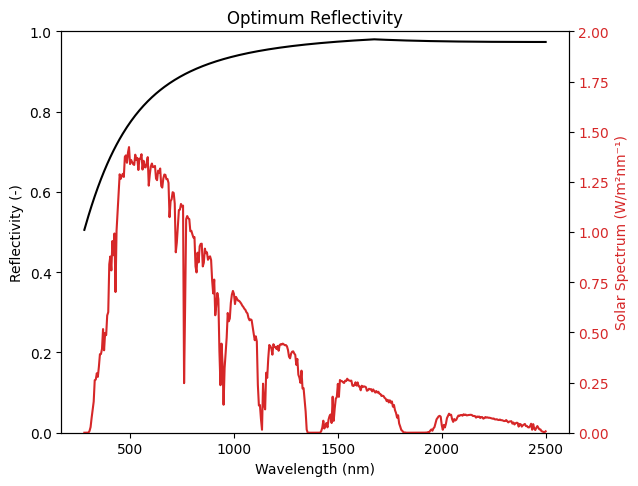

In [5]:
Reflectivity_plot(parameters, Experience_results, directory)